Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

Accessing CSV file

In [ ]:
df = pd.read_csv('/content/cpcb_dly_aq_tamil_nadu-2014.csv')
df.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN


Modify the dates as month and sort it out according to the month

In [ ]:
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'], format='%d-%m-%y')
df['Sampling Month'] = df['Sampling Date'].dt.strftime('%B')

df['Sampling Date'] = pd.to_datetime(df['Sampling Date'], format='%B')

df = df.sort_values(by='Sampling Date')

Deleting the PM 2.5 Column

In [ ]:
df.drop(columns=['PM 2.5'], inplace=True)

Change the attributes as string and deleting the NA rows

In [ ]:
df['SO2'] = df['SO2'].astype(str)
df['NO2'] = df['NO2'].astype(str)
df['RSPM/PM10'] = df['RSPM/PM10'].astype(str)

df = df[~df['SO2'].str.contains('NA') &
        ~df['NO2'].str.contains('NA') &
        ~df['RSPM/PM10'].str.contains('NA')]

Retain the attributes type as Float

In [ ]:
df['SO2'] = df['SO2'].astype(float)
df['NO2'] = df['NO2'].astype(float)
df['RSPM/PM10'] = df['RSPM/PM10'].astype(float)

Checking the data types

In [ ]:
df.dtypes

Stn Code                                   int64
Sampling Date                     datetime64[ns]
State                                     object
City/Town/Village/Area                    object
Location of Monitoring Station            object
Agency                                    object
Type of Location                          object
SO2                                      float64
NO2                                      float64
RSPM/PM10                                float64
Sampling Month                            object
dtype: object

Modify the SO2 ,NO2 and RSPM/PM10 for our convenient

In [ ]:
so2_conditions = [
    (df['SO2'] < 20),
    (df['SO2'] >= 20) & (df['SO2'] <= 100),
    (df['SO2'] > 100) & (df['SO2'] <= 200),
    (df['SO2'] > 200) & (df['SO2'] <= 500),
    (df['SO2'] > 500)
]

so2_labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy']

df['SO2 Level'] = np.select(so2_conditions, so2_labels, default='Unknown')

no2_conditions = [
    (df['NO2'] < 40),
    (df['NO2'] >= 40) & (df['NO2'] <= 100),
    (df['NO2'] > 100) & (df['NO2'] <= 200),
    (df['NO2'] > 200) & (df['NO2'] <= 400),
    (df['NO2'] > 400)
]

no2_labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy']

df['NO2 Level'] = np.select(no2_conditions, no2_labels, default='Unknown')

rspm_pm10_conditions = [
    (df['RSPM/PM10'] < 50),
    (df['RSPM/PM10'] >= 50) & (df['RSPM/PM10'] <= 150),
    (df['RSPM/PM10'] > 150) & (df['RSPM/PM10'] <= 250),
    (df['RSPM/PM10'] > 250) & (df['RSPM/PM10'] <= 350),
    (df['RSPM/PM10'] > 350)
]

rspm_pm10_labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy']

df['RSPM/PM10 Level'] = np.select(rspm_pm10_conditions, rspm_pm10_labels, default='Unknown')

Delete the empty rows

In [ ]:
df.dropna(axis=0, how='any', inplace=True)

In [ ]:
df.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,Sampling Month,SO2 Level,NO2 Level,RSPM/PM10 Level
1300,759,2014-01-02,Tamil Nadu,Cuddalore,Eachangadu Villagae,Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",10.0,24.0,106.0,January,Good,Good,Moderate
2417,240,2014-01-02,Tamil Nadu,Thoothukudi,"Raja Agencies, Tuticorin",Tamilnadu State Pollution Control Board,Industrial Area,13.0,21.0,101.0,January,Good,Good,Moderate
1692,307,2014-01-02,Tamil Nadu,Madurai,Fenner (I) Ltd. Employees Assiciation Building...,Tamilnadu State Pollution Control Board,Industrial Area,13.0,20.0,17.0,January,Good,Good,Good
1007,375,2014-01-02,Tamil Nadu,Coimbatore,"Poniarajapuram, On the top of DEL, Coimbatore",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",4.0,24.0,60.0,January,Good,Good,Moderate
1308,759,2014-01-03,Tamil Nadu,Cuddalore,Eachangadu Villagae,Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",11.0,24.0,90.0,January,Good,Good,Moderate


Save the cleaned data as a CSV File

In [ ]:
df.to_csv('cpcb_dly_aq_tamil_nadu-2014_cleaned.csv', index=False)

Make it as count and visualize the data as bar chart for user convenient

<ipython-input-14-0bbc2e0e067a>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


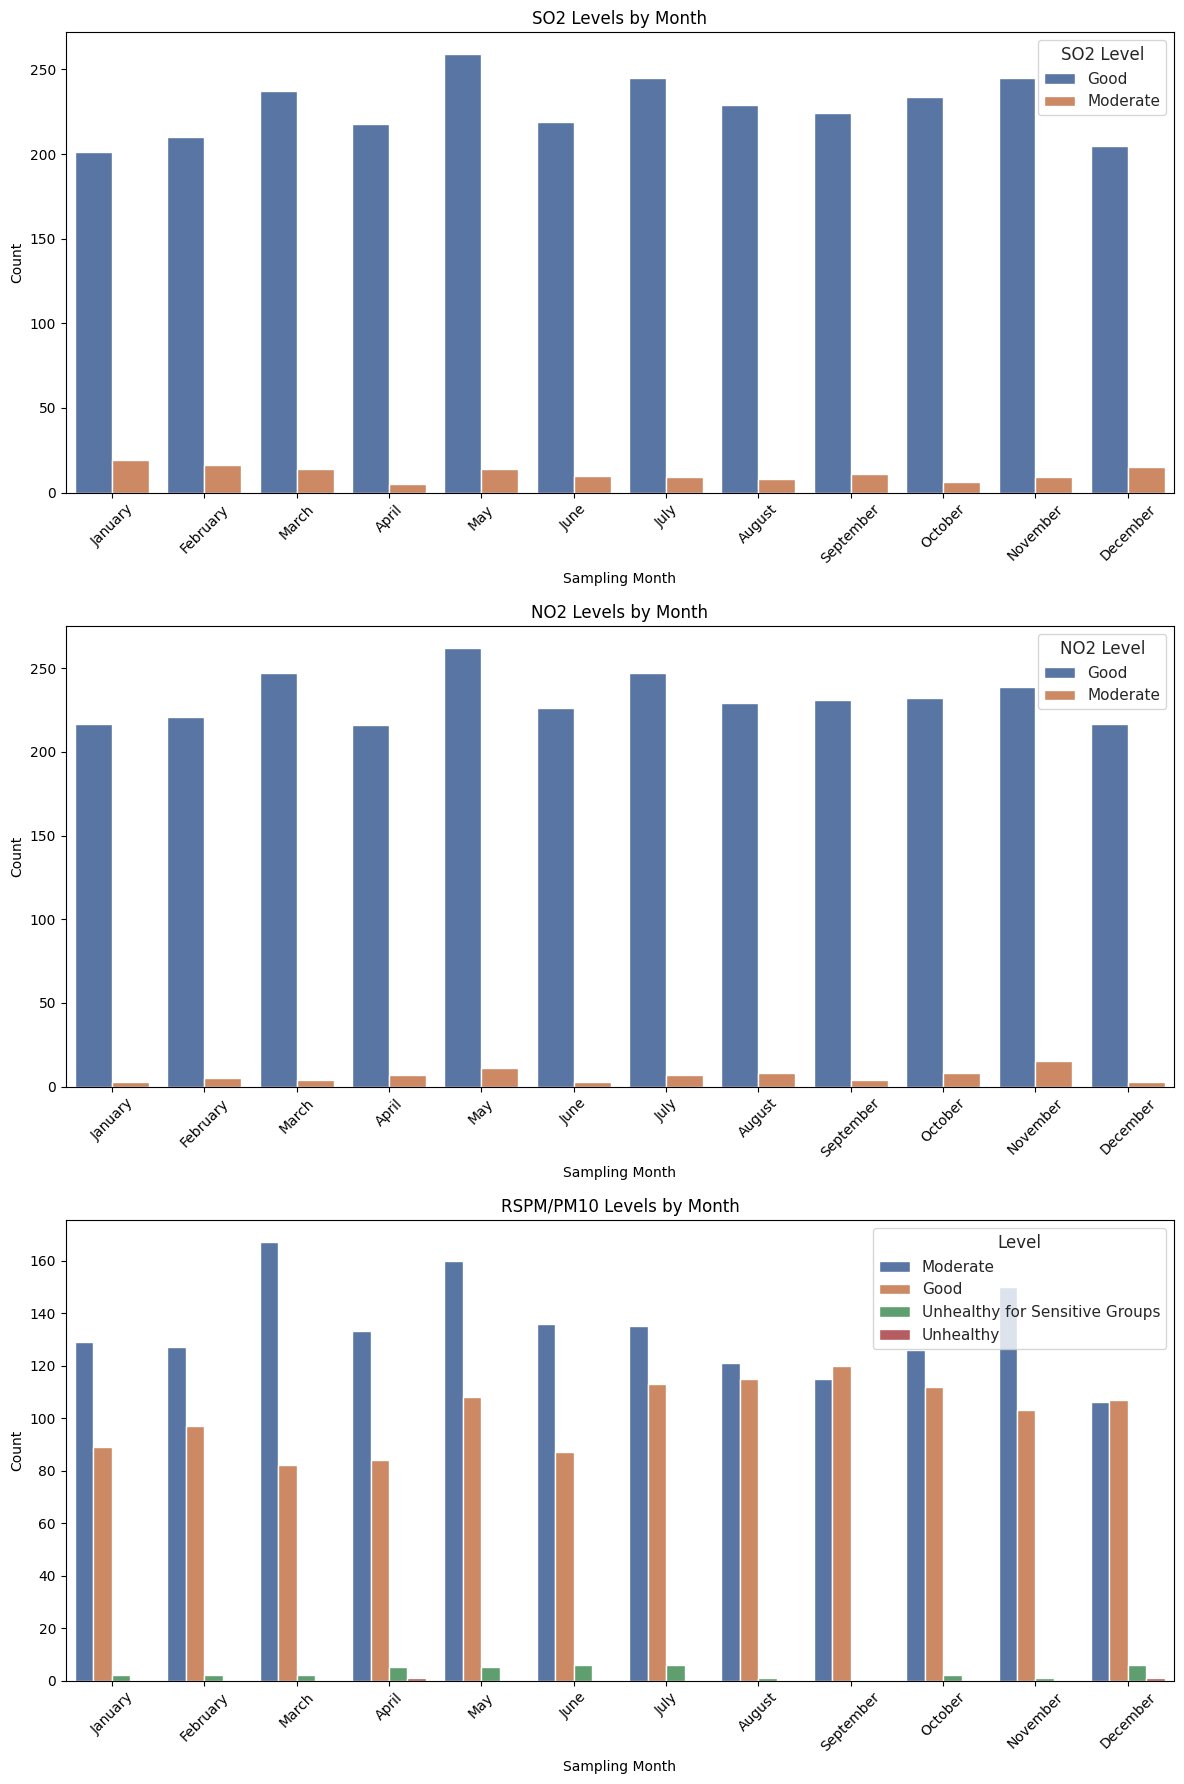

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.set(style="whitegrid")
sns.countplot(data=df, x='Sampling Month', hue='SO2 Level', order=month_order, ax=axes[0])
axes[0].set_title('SO2 Levels by Month')
axes[0].set_xlabel('Sampling Month')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='Sampling Month', hue='NO2 Level', order=month_order, ax=axes[1])
axes[1].set_title('NO2 Levels by Month')
axes[1].set_xlabel('Sampling Month')
axes[1].set_ylabel('Count')

sns.countplot(data=df, x='Sampling Month', hue='RSPM/PM10 Level', order=month_order, ax=axes[2])
axes[2].set_title('RSPM/PM10 Levels by Month')
axes[2].set_xlabel('Sampling Month')
axes[2].set_ylabel('Count')
axes[2].legend(title='Level', loc='upper right')

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Make it as pie Chart for user visualization

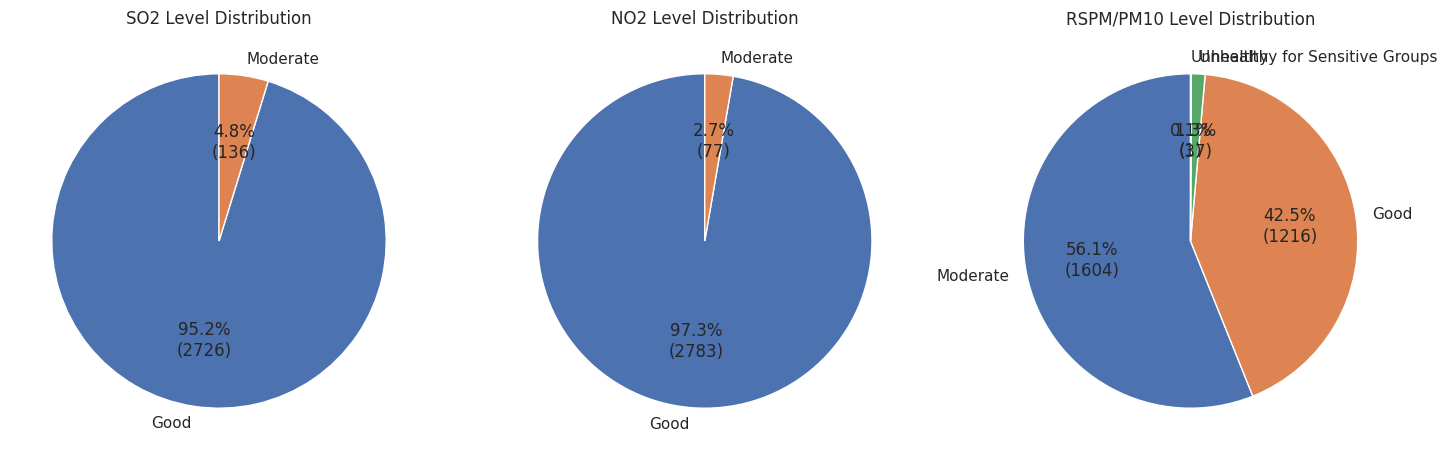

In [ ]:
so2_counts = df['SO2 Level'].value_counts()
no2_counts = df['NO2 Level'].value_counts()
rspm_pm10_counts = df['RSPM/PM10 Level'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

def func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return f'{pct:.1f}%\n({absolute})'

axes[0].pie(so2_counts, labels=so2_counts.index, autopct=lambda pct: func(pct, so2_counts), startangle=90)
axes[0].set_title('SO2 Level Distribution')

axes[1].pie(no2_counts, labels=no2_counts.index, autopct=lambda pct: func(pct, no2_counts), startangle=90)
axes[1].set_title('NO2 Level Distribution')

axes[2].pie(rspm_pm10_counts, labels=rspm_pm10_counts.index, autopct=lambda pct: func(pct, rspm_pm10_counts), startangle=90)
axes[2].set_title('RSPM/PM10 Level Distribution')

plt.tight_layout()

plt.show()

Make it as Graph for user convenient

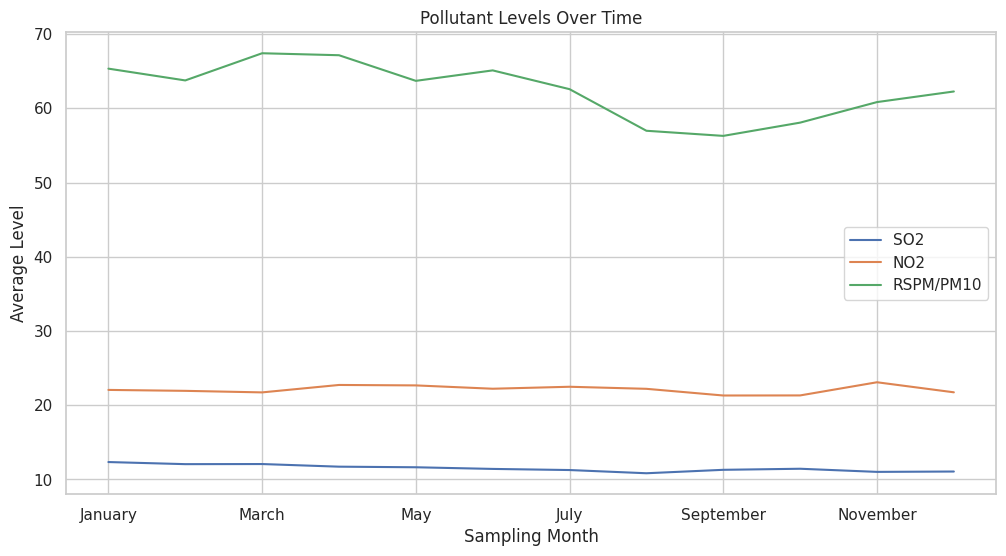

In [ ]:
plt.figure(figsize=(12, 6))
ax = plt.gca()

months_in_order = [calendar.month_name[i] for i in range(1, 13)]

df['Sampling Month'] = pd.Categorical(df['Sampling Month'], categories=months_in_order, ordered=True)

grouped = df.groupby('Sampling Month')[['SO2', 'NO2', 'RSPM/PM10']].mean()

grouped.plot(kind='line', ax=ax)

plt.title('Pollutant Levels Over Time')
plt.xlabel('Sampling Month')
plt.ylabel('Average Level')

plt.legend(loc='best')

plt.show()

Linear Regression

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load the cleaned data

In [ ]:
df = pd.read_csv('cpcb_dly_aq_tamil_nadu-2014_cleaned.csv')

Define the X and Y value. Then create the model to check the accuracy

In [ ]:
features = ['Stn Code', 'SO2 Level', 'NO2 Level', 'RSPM/PM10 Level']
target_variables = ['SO2', 'NO2', 'RSPM/PM10']

for target_variable in target_variables:
    # Prepare the data
    X = df[features].copy()
    y = df[target_variable]

    X = pd.get_dummies(X, columns=['SO2 Level', 'NO2 Level', 'RSPM/PM10 Level'], drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = (r2_score(y_test, y_pred))*100

    print(f"Regression for {target_variable}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")
    print()

Regression for SO2:
Mean Squared Error (MSE): 16.960494449831963
R-squared (R2): 33.5919137366274

Regression for NO2:
Mean Squared Error (MSE): 29.857521773536106
R-squared (R2): 46.003519095105226

Regression for RSPM/PM10:
Mean Squared Error (MSE): 274.962811458277
R-squared (R2): 68.17492672450331



Random Forest Regression

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

Load the cleaned dataset

In [ ]:
df = pd.read_csv('cpcb_dly_aq_tamil_nadu-2014_cleaned.csv')

Define the X and Y value. Then create the model to check the accuracy

In [ ]:
features = ['Stn Code', 'SO2 Level', 'NO2 Level', 'RSPM/PM10 Level']
target_variables = ['SO2', 'NO2', 'RSPM/PM10']

models = {}
evaluation_results = {}

for target_variable in target_variables:
    X = df[features].copy()
    y = df[target_variable]

    X = pd.get_dummies(X, columns=['SO2 Level', 'NO2 Level', 'RSPM/PM10 Level'], drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = sqrt(mean_squared_error(y_test, y_pred))

    r2 = (r2_score(y_test, y_pred))*100

    models[target_variable] = model
    evaluation_results[target_variable] = {'RMSE': rmse, 'R2': r2}

for target_variable, results in evaluation_results.items():
    print(f"Regression for {target_variable}:")
    print(f"Root Mean Squared Error (RMSE): {results['RMSE']}")
    print(f"R-squared (R2): {results['R2']}")
    print()

Regression for SO2:
Root Mean Squared Error (RMSE): 2.411431625611627
R-squared (R2): 77.23160797063746

Regression for NO2:
Root Mean Squared Error (RMSE): 3.9762238502526412
R-squared (R2): 71.4074196069062

Regression for RSPM/PM10:
Root Mean Squared Error (RMSE): 13.57390595126373
R-squared (R2): 78.6742102059051

